In [10]:
# Mengimpor library untuk manipulasi data dan visualisasi
import numpy as np  # untuk mengelola data numerik
import pandas as pd # untuk membaca dan mengelola file CSV
import matplotlib.pyplot as plt # untuk visualisasi grafik

# Membaca file dataset asuransi
dataset = pd.read_csv('Data_Asuransi_Jiwa1.csv')

# Memisahkan fitur (Umur, Penghasilan) dan target (DaftarAsuransi)
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Menampilkan fitur dan target
print("Fitur (Umur, Penghasilan):\n", x)
print("Label (Daftar Asuransi):\n", y)

Fitur (Umur, Penghasilan):
 [[    56  66175]
 [    46  27805]
 [    32  25237]
 [    25 135247]
 [    38  40056]
 [    56  65543]
 [    36  76556]
 [    40 134548]
 [    28 131488]
 [    28  23343]
 [    41  33500]
 [    53  73222]
 [    57  49375]
 [    41  29662]
 [    20  36964]
 [    39 133429]
 [    19 141692]
 [    41  79638]
 [    47  93666]
 [    55 105067]
 [    19 138937]
 [    38  87215]
 [    50  89042]
 [    29  33284]
 [    39  92789]
 [    42 104664]
 [    44 113468]
 [    59  81389]
 [    45  29435]
 [    33  74340]
 [    32  64078]
 [    20  98832]
 [    54  71293]
 [    24 115981]
 [    38  98781]
 [    26  80403]
 [    56  49124]
 [    35 115435]
 [    21  63919]
 [    42 128761]
 [    31 141305]
 [    26  55247]
 [    43 141172]
 [    19 114758]
 [    37 111747]
 [    45  82752]
 [    24  76573]
 [    25  79101]
 [    52 122756]
 [    31  46646]
 [    34 124185]
 [    53  43049]
 [    57  99605]
 [    21 118116]
 [    19 117379]
 [    23  88385]
 [    59 146131]
 [ 

In [11]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi 75% data latih dan 25% data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Menampilkan data yang sudah dibagi
print("Data latih (x):\n", x_train)
print("Data latih (y):\n", y_train)
print("Data uji (x):\n", x_test)
print("Data uji (y):\n", y_test)

Data latih (x):
 [[    36 111792]
 [    53  80160]
 [    54  96539]
 [    44 132856]
 [    20  62344]
 [    50 110469]
 [    42  92369]
 [    30  81529]
 [    28  81476]
 [    51  53591]
 [    56 102986]
 [    34 140420]
 [    38 102848]
 [    38  87215]
 [    39  98752]
 [    36  94460]
 [    53  39870]
 [    31  46646]
 [    24 144097]
 [    46  86203]
 [    52 117856]
 [    58  43625]
 [    48  82856]
 [    42  70343]
 [    21  25713]
 [    49 103042]
 [    50  89042]
 [    20  60262]
 [    24 122023]
 [    54  20728]
 [    45 108726]
 [    43  81813]
 [    32  36364]
 [    43 108092]
 [    20 109930]
 [    25  58494]
 [    58  81642]
 [    49 122795]
 [    48  72736]
 [    41  79638]
 [    23 130448]
 [    40  52307]
 [    32  64078]
 [    52  35305]
 [    52 123605]
 [    51  32161]
 [    40  24835]
 [    54  33807]
 [    47 113105]
 [    31  96797]
 [    49  88866]
 [    43  40358]
 [    47  81629]
 [    52 108668]
 [    53  58102]
 [    40  58756]
 [    50  29435]
 [    32  3133

In [12]:
from sklearn.preprocessing import StandardScaler

# Melakukan standarisasi data agar model lebih optimal
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [13]:
from sklearn.naive_bayes import GaussianNB

# Membuat model klasifikasi dengan Gaussian Naive Bayes
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [14]:
# Melakukan prediksi pada data uji
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Membuat confusion matrix dan menghitung akurasi
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi : %d persen " % (akurasi * 100))

Confusion Matrix:
 [[40  4]
 [ 3 53]]
Tingkat Akurasi : 93 persen 


<ipython-input-16-5fb92338c45b>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


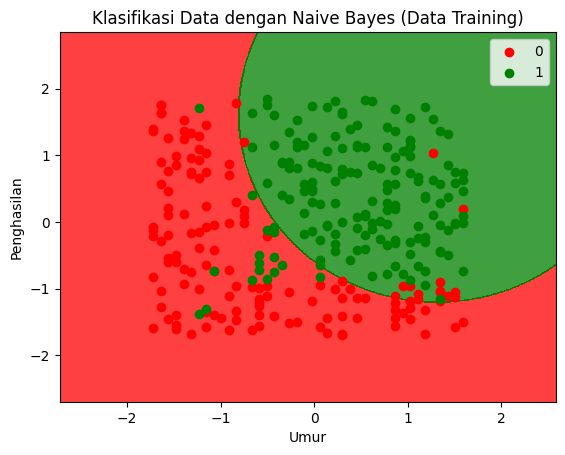

In [16]:
from matplotlib.colors import ListedColormap

# Visualisasi hasil klasifikasi pada data latih
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Penghasilan')
plt.legend()
plt.show()

<ipython-input-17-4fad50e01633>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


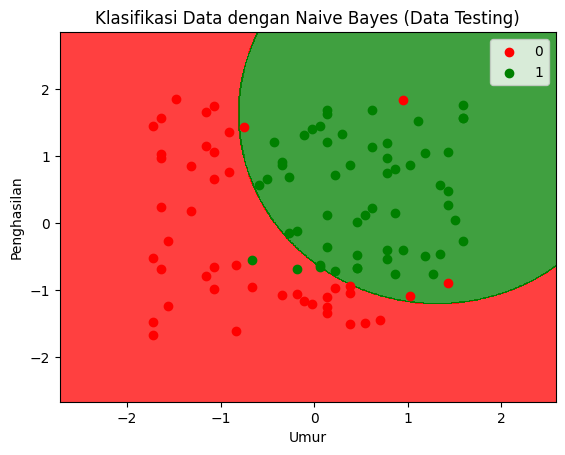

In [17]:
# Visualisasi hasil klasifikasi pada data uji
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Penghasilan')
plt.legend()
plt.show()